# Project 9-- Seyi Ogunmodede

**Instructor:** Dr. Mark

- Help with figuring out how to write a function.
    
**Collaboration:** 
    


## Question 1

In [1]:
options(jupyter.rich_display = F)

In [2]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=200)

In [3]:
library(data.table)

In [4]:
itcont <- fread("/anvil/projects/tdm/data/election/escaped/itcont2020sample.txt")

In [5]:
head(itcont)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [6]:
benford_law <- function (d) { log((d+1)/d)/ log(10) }

In [7]:
benford_law (1)

[1] 0.30103

In [8]:
digits <- 1:9

In [9]:
digits

[1] 1 2 3 4 5 6 7 8 9

In [10]:
benford_law (2)
# this can be done but it bwill take lot of time

[1] 0.1760913

In [11]:
sapply(digits,benford_law )

[1] 0.30103000 0.17609126 0.12493874 0.09691001 0.07918125 0.06694679 0.05799195
[8] 0.05115252 0.04575749

In [12]:
sum(sapply(digits,benford_law ))
# the summation is 1 to prove probability summation

[1] 1

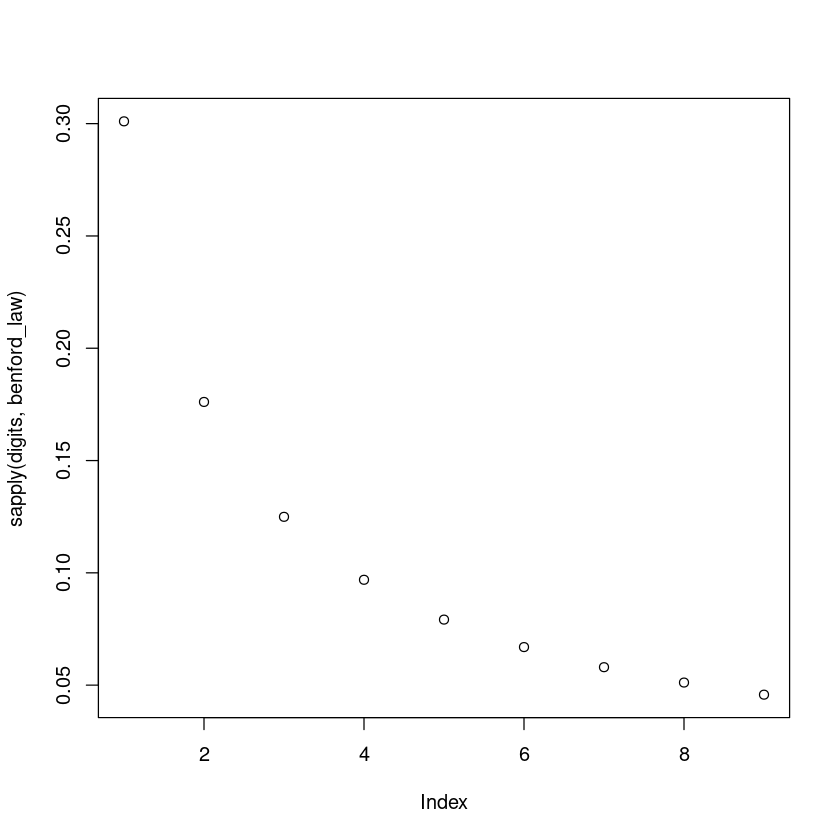

In [13]:
plot(sapply(digits,benford_law ))

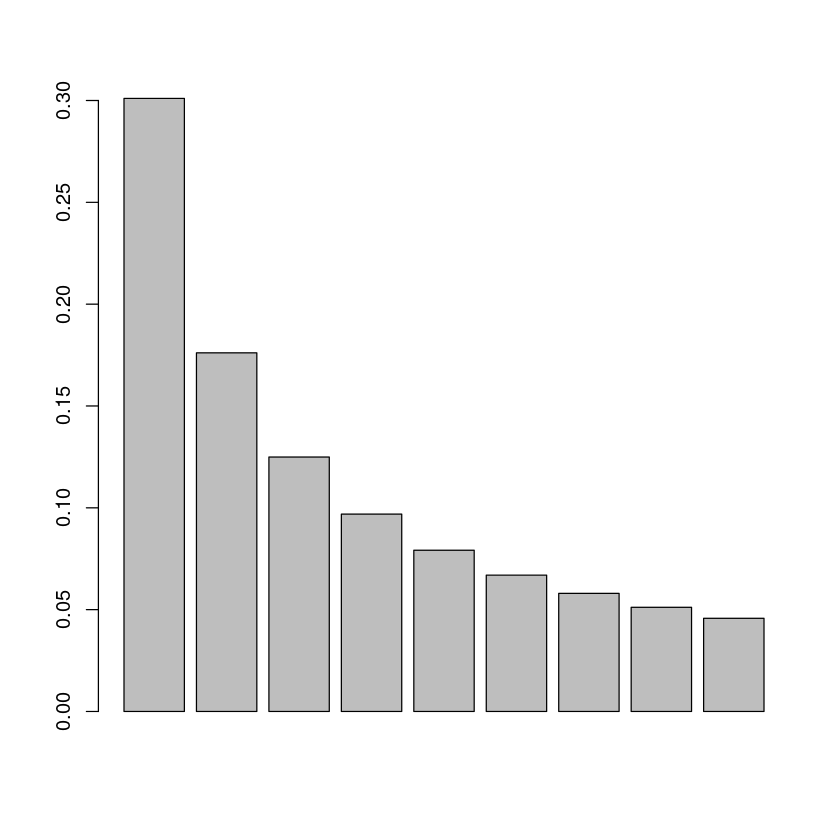

In [14]:
barplot(sapply(digits,benford_law ))

Markdown notes and sentences and analysis written here.

## Question 2

In [15]:
head(itcont)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [16]:
head(itcont$TRANSACTION_AMT)

[1] 15 39 15 10 16 42

In [17]:
substr(head(itcont$TRANSACTION_AMT), 1,1)
# using substring to go to first position and get the first digits of those numbers using 1,1

[1] "1" "3" "1" "1" "1" "4"

In [18]:
substr(head(itcont$TRANSACTION_AMT, n=50), 1,1)
#  this is for the first 50 number

 [1] "1" "3" "1" "1" "1" "4" "5" "1" "5" "2" "2" "8" "1" "5" "2" "5" "5" "4" "5"
[20] "2" "5" "2" "2" "1" "5" "1" "1" "3" "5" "1" "1" "3" "2" "2" "2" "2" "2" "2"
[39] "3" "2" "3" "2" "1" "1" "6" "7" "6" "3" "5" "3"

In [19]:
table(substr(head(itcont$TRANSACTION_AMT, n=10000), 1,1))
# from the table there are -ve and zeros with values


   -    0    1    2    3    4    5    6    7    8    9 
  52   54 2969 3287  886  351 1864  212  165  106   54 

In [20]:
table(substr(itcont$TRANSACTION_AMT, 1,1))

# this is the table of all the results 
# Then need to remove those of -ve and zeros
# to do that there are eleven element from -ve to 9 (1:11)


      -       0       1       2       3       4       5       6       7       8 
  22428   23054 1355315 1551720  430503  160707  887424   92464   81086   44403 
      9 
  29658 

In [21]:
table(substr(itcont$TRANSACTION_AMT, 1,1)) [3:11]

#this is from 3:11 elements
# this show only the digits from 1:9


      1       2       3       4       5       6       7       8       9 
1355315 1551720  430503  160707  887424   92464   81086   44403   29658 

In [22]:
firstdigit <- table(substr(itcont$TRANSACTION_AMT, 1,1)) [3:11]
# create a vector called first digit

In [23]:
class(firstdigit)

[1] "table"

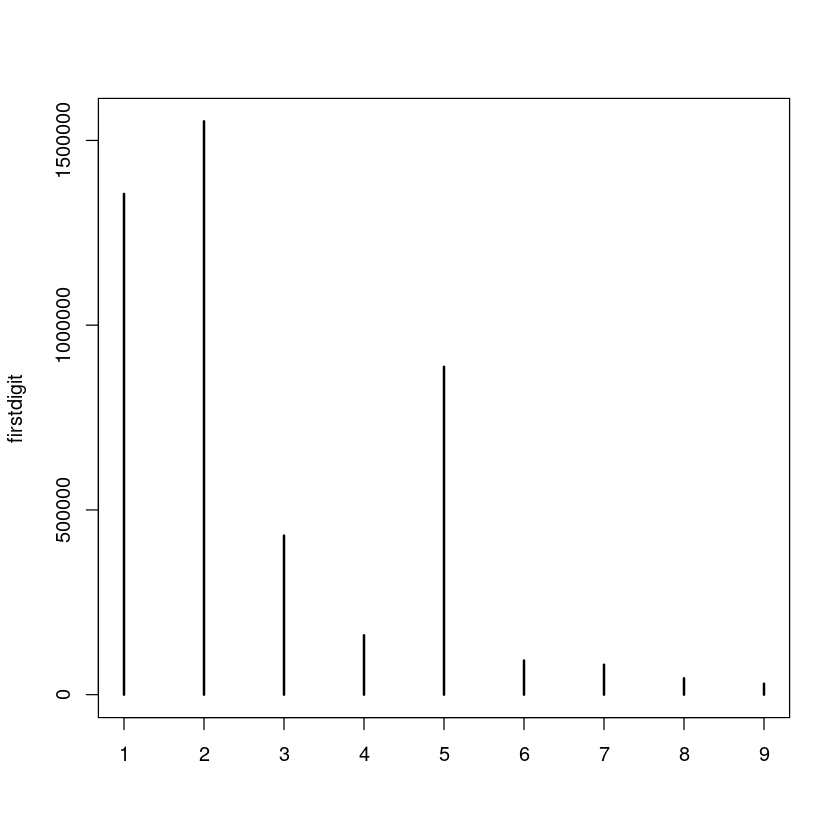

In [24]:
plot (firstdigit)

In [25]:
firstdigit


      1       2       3       4       5       6       7       8       9 
1355315 1551720  430503  160707  887424   92464   81086   44403   29658 

In [26]:
sapply(digits,benford_law )

[1] 0.30103000 0.17609126 0.12493874 0.09691001 0.07918125 0.06694679 0.05799195
[8] 0.05115252 0.04575749

In [27]:
firstdigit/sapply(digits,benford_law )


         1          2          3          4          5          6          7 
 4502259.0  8812021.7  3445712.8  1658311.6 11207502.3  1381156.6  1398228.6 
         8          9 
  868051.0   648156.2 

Markdown notes and sentences and analysis written here.

## Question 3

In [28]:
head(itcont)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [29]:
head(itcont$EMPLOYER) 

[1] "RETIRED"      "NOT EMPLOYED" "NOT EMPLOYED" "SELF"         ""            
[6] "HOMEMAKER"   

In [30]:
 head(itcont$OCCUPATION) 

[1] "NOT EMPLOYED"        "NOT EMPLOYED"        "NOT EMPLOYED"       
[4] "HEALTH PROFESSIONAL" ""                    "HOMEMAKER"          

In [31]:
k <- rep(TRUE,6)
# let k rep TRUEfor the first 6 for both employer and occupation

In [32]:
k

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [33]:
k[head(itcont$EMPLOYER) == "NOT EMPLOYED"] <- FALSE

#  FALSE column if employer is not employed

In [34]:
k[head(itcont$OCCUPATION) == "NOT EMPLOYED"] <- FALSE
#  FALSE column if occupation is not employed

In [35]:
k

# it false for the first value because occupation say not employed
# false second and third value because both says not employed
# false for forth, fifth and sixth value because it is notemployed for the three

[1] FALSE FALSE FALSE  TRUE  TRUE  TRUE

In [36]:
itcont$employed <- TRUE

In [37]:
itcont$employed[itcont$EMPLOYER == "NOT EMPLOYED"]<- FALSE

In [38]:
itcont$employed[itcont$OCCUPATION == "NOT EMPLOYED"]<- FALSE

In [39]:
table(itcont$employed)


  FALSE    TRUE 
1136507 3542255 

In [40]:
myemployerarray <- function (relaydf) {
    # since I called the function relaydf, i must change itcont to relaydf
    relaydf$employed <- TRUE
    relaydf$employed[itcont$EMPLOYER == "NOT EMPLOYED"]<- FALSE
    relaydf$employed[itcont$OCCUPATION == "NOT EMPLOYED"]<- FALSE
    return(relaydf)
}
 

In [41]:
head(myemployerarray(itcont))

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [42]:
table(myemployerarray(itcont)$employed)


  FALSE    TRUE 
1136507 3542255 

Markdown notes and sentences and analysis written here.

## Question 4

In [43]:
myemployerarray <- function (relaydf) {
    # it has one argument
    relaydf$employed <- TRUE
    # create a data frame that has all EMPLOYER employed to be true
    relaydf$employed[itcont$EMPLOYER == "NOT EMPLOYED"]<- FALSE
    # a data frame for EMPLOYER when it is not employed to reflect false
    relaydf$employed[itcont$OCCUPATION == "NOT EMPLOYED"]<- FALSE
     # a data frame for OCCUPATION when it is not employed to reflect false
    return(relaydf)
    #return (the number of TRUE from FALSE in the argument data frame)
}

In [44]:
table(myemployerarray(itcont)$employed)


  FALSE    TRUE 
1136507 3542255 

Warning message in dotchart(table(myemployerarray(itcont)$employed)):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


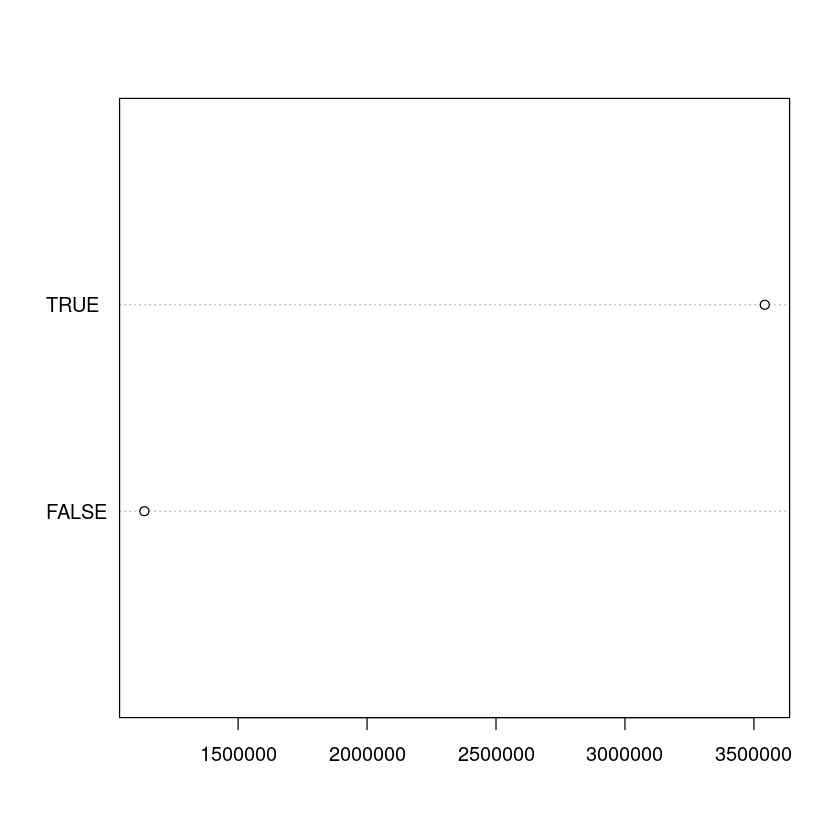

In [45]:
dotchart(table(myemployerarray(itcont)$employed))

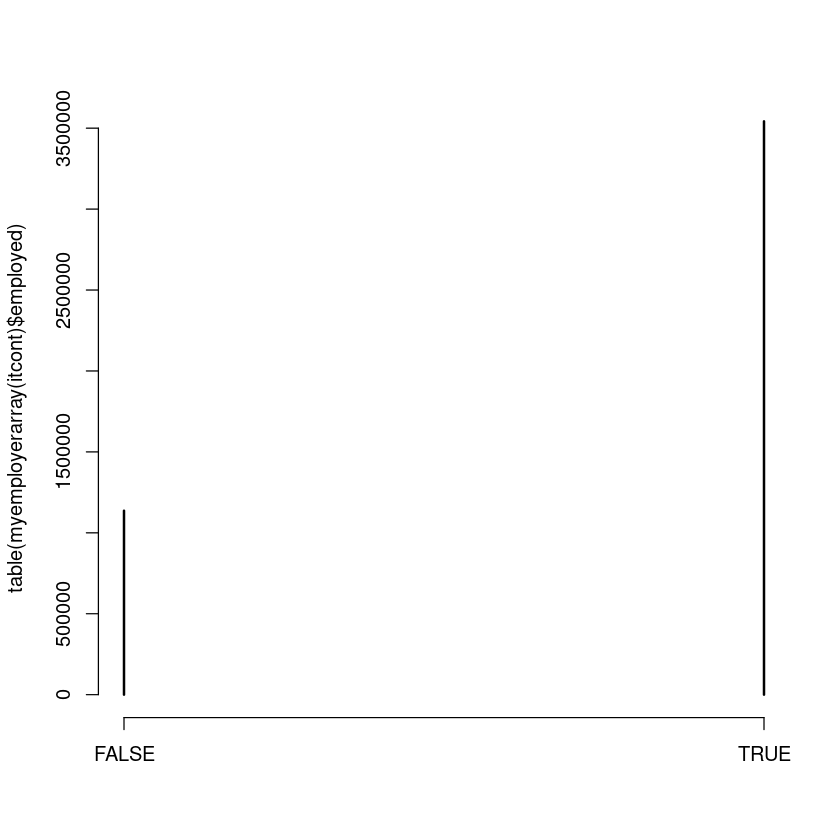

In [46]:
plot(table(myemployerarray(itcont)$employed))

In [47]:
gotcha<-table(itcont$employed)
# to show the percentage of individuals employed vs not employed

In [48]:
gotcha/2
# divididing the equation by 2
# sample for verification


    FALSE      TRUE 
 568253.5 1771127.5 

In [49]:
(gotcha/sum(gotcha))*100
# individual ( TRUE, FALSE) divided by their summation
# multiply the answer by 100 to change to percentage


   FALSE     TRUE 
24.29076 75.70924 

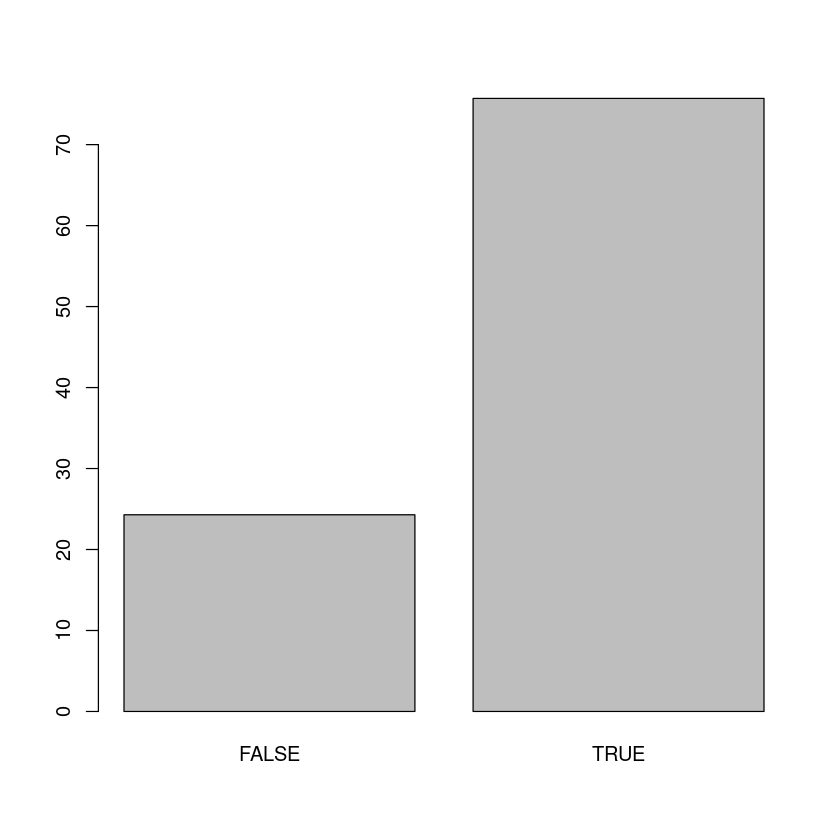

In [50]:
barplot((gotcha/sum(gotcha))*100)
# barplot graph

In [51]:
percentage <-((gotcha/sum(gotcha))*100)
# create  data frame for the division oucome

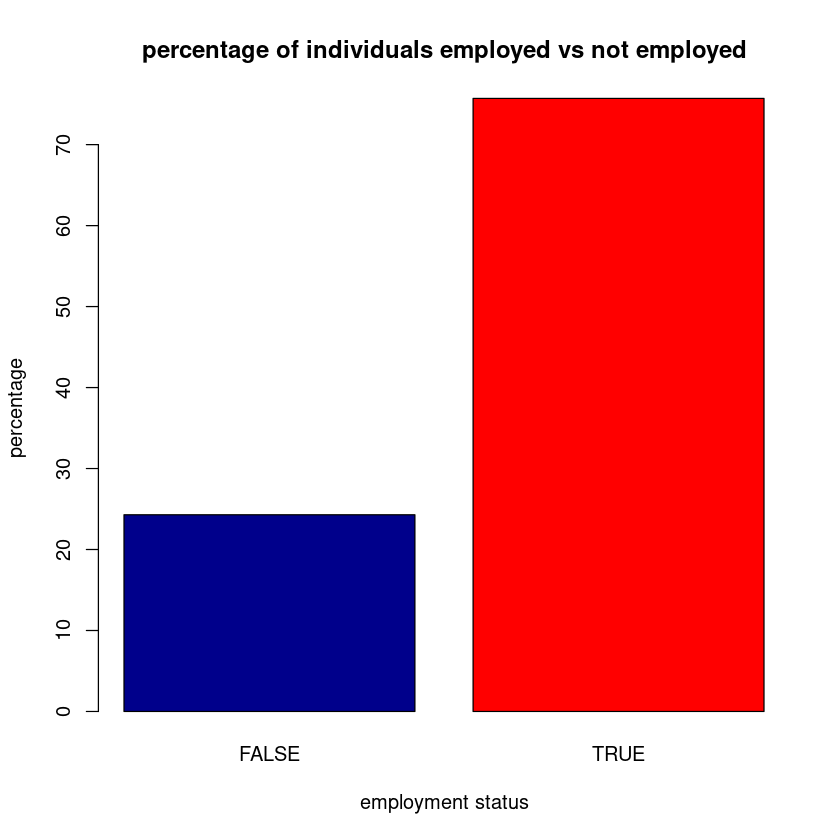

In [52]:
barplot(percentage, main="percentage of individuals employed vs not employed",
        xlab= "employment status", col= c("darkblue","red"),
       ylab = "percentage")

# to put label and clour

Markdown notes and sentences and analysis written here.

## Question 5

In [53]:
head(itcont)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [54]:
temp <- function(state, max_amount) {
     yope<-itcont[itcont$STATE==state]
    rope<- yope[yope$TRANSACTION_AMT <= max_amount]
    return (rope)
    
    
}

In [55]:
state<- "FL"

In [56]:
 yope<-itcont[itcont$STATE==state]

In [57]:
head(yope)
# a subset of itcont  inside one state

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00618371 N         Q3     P               201910159164412175 15            
3 C00696948 N         M2     P2020           202002209186793664 15E           
4 C00365536 A         YE     P               202002219187239283 15            
5 C00580068 N         M4     P               202004189219713222 15E           
6 C00615294 N         YE     P2020           202001289167425289 15            
  ENTITY_TP NAME                   CITY              STATE ZIP_CODE 
1 IND       SOLOMON, VICTOR        CAPE CORAL        FL    33904    
2 IND       GIEBEL, BETTY          KISSIMMEE         FL    34744    
3 IND       PIRONKOVA IRWIN, MARIA COCOA             FL    329262715
4 IND       HALLETT, JEFFREY       PONTE VEDRA BEACH FL    320823306
5 IND       KLAUDER, JOHN          GAINESVILLE       FL    326118440
6 IND       HARRISON, JEFFREY P  

In [58]:
rope<- yope[yope$TRANSACTION_AMT <= 15]

In [59]:
head(rope)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00696948 N         M2     P2020           202002209186793664 15E           
3 C00580068 N         M4     P               202004189219713222 15E           
4 C00618371 N         Q1     P               202004159219383798 15            
5 C00401224 N         YE                     202001299170214666 24T           
6 C00401224 N         YE                     202001299170938312 24T           
  ENTITY_TP NAME                   CITY         STATE ZIP_CODE  EMPLOYER    
1 IND       SOLOMON, VICTOR        CAPE CORAL   FL    33904     RETIRED     
2 IND       PIRONKOVA IRWIN, MARIA COCOA        FL    329262715 INMARSAT    
3 IND       KLAUDER, JOHN          GAINESVILLE  FL    326118440 NOT EMPLOYED
4 IND       DOWNES, CHERYL         ORMOND BEACH FL    32176     RETIRED     
5 IND       GRAFF, SHERRY          CAPE CORAL   FL    33914   

In [60]:
head(temp ("FL",15))

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00696948 N         M2     P2020           202002209186793664 15E           
3 C00580068 N         M4     P               202004189219713222 15E           
4 C00618371 N         Q1     P               202004159219383798 15            
5 C00401224 N         YE                     202001299170214666 24T           
6 C00401224 N         YE                     202001299170938312 24T           
  ENTITY_TP NAME                   CITY         STATE ZIP_CODE  EMPLOYER    
1 IND       SOLOMON, VICTOR        CAPE CORAL   FL    33904     RETIRED     
2 IND       PIRONKOVA IRWIN, MARIA COCOA        FL    329262715 INMARSAT    
3 IND       KLAUDER, JOHN          GAINESVILLE  FL    326118440 NOT EMPLOYED
4 IND       DOWNES, CHERYL         ORMOND BEACH FL    32176     RETIRED     
5 IND       GRAFF, SHERRY          CAPE CORAL   FL    33914   

In [61]:
head(temp ("FL",10))

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00696948 N         M2     P2020           202002209186793664 15E           
2 C00580068 N         M4     P               202004189219713222 15E           
3 C00618371 N         Q1     P               202004159219383798 15            
4 C00401224 N         YE                     202001299170228603 24T           
5 C00401224 N         YE                     202001299169021444 24T           
6 C00703975 A         Q3     P2020           201912179166342286 15E           
  ENTITY_TP NAME                   CITY         STATE ZIP_CODE 
1 IND       PIRONKOVA IRWIN, MARIA COCOA        FL    329262715
2 IND       KLAUDER, JOHN          GAINESVILLE  FL    326118440
3 IND       DOWNES, CHERYL         ORMOND BEACH FL    32176    
4 IND       GRANT, JILL            POMONA PARK  FL    32181    
5 IND       CRUZ, MICHELLE         VENICE       FL    34293    
6 IND       VECCHITTO, JAMES       ST AUGUSTINE FL    320920713

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.